In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from numpy import log
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import pacf
import keras
from keras.models import Sequential
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM, SimpleRNN
from keras.layers import Dense
from statsmodels.tsa.stattools import pacf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

#  1. Load Google Stock Price data

In [98]:
dataset = pd.read_csv('Google.csv')
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Date
0,2.490664,2.591785,2.390042,2.499133,2.499133,897427216,2004-08-19
1,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,2004-08-20
2,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,2004-08-23
3,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,2004-08-24
4,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,2004-08-25


In [99]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4677.000000,4677.000000,4677.000000,4677.000000,4677.000000,4.677000e+03
mean,38.255309,38.656113,37.861995,38.265822,38.265822,1.226090e+08
std,35.540477,35.943265,35.161971,35.555944,35.555944,1.529406e+08
min,2.470490,2.534002,2.390042,2.490913,2.490913,1.584340e+05
25%,12.657307,12.771629,12.487195,12.640869,12.640869,2.968400e+07
50%,25.577278,25.772150,25.253166,25.534290,25.534290,6.698614e+07
75%,54.528500,55.233501,53.894001,54.546501,54.546501,1.527946e+08
max,151.863495,152.100006,149.887497,150.709000,150.709000,1.650833e+09


#  2. EDA on Google Stock Data

## Checking for any null values present in the dataset

In [100]:
dataset.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Date         0
dtype: int64

## Plotting Few price data

In [101]:
start_date = pd.to_datetime(dataset.Date[0])
end_date = pd.to_datetime(dataset.Date.values[-1])
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [102]:
dataset.tail()

,Open,High,Low,Close,Adj Close,Volume,Date
4672,90.565002,93.080002,89.940002,91.660004,91.660004,31508600,2023-03-13
4673,93.070000,94.830002,92.779999,94.250000,94.250000,32303900,2023-03-14
4674,93.540001,97.250000,93.040001,96.550003,96.550003,38367300,2023-03-15
4675,96.570000,101.970001,95.870003,101.070000,101.070000,54499500,2023-03-16
4676,100.839996,103.489998,100.750000,102.459999,102.459999,76109100,2023-03-17


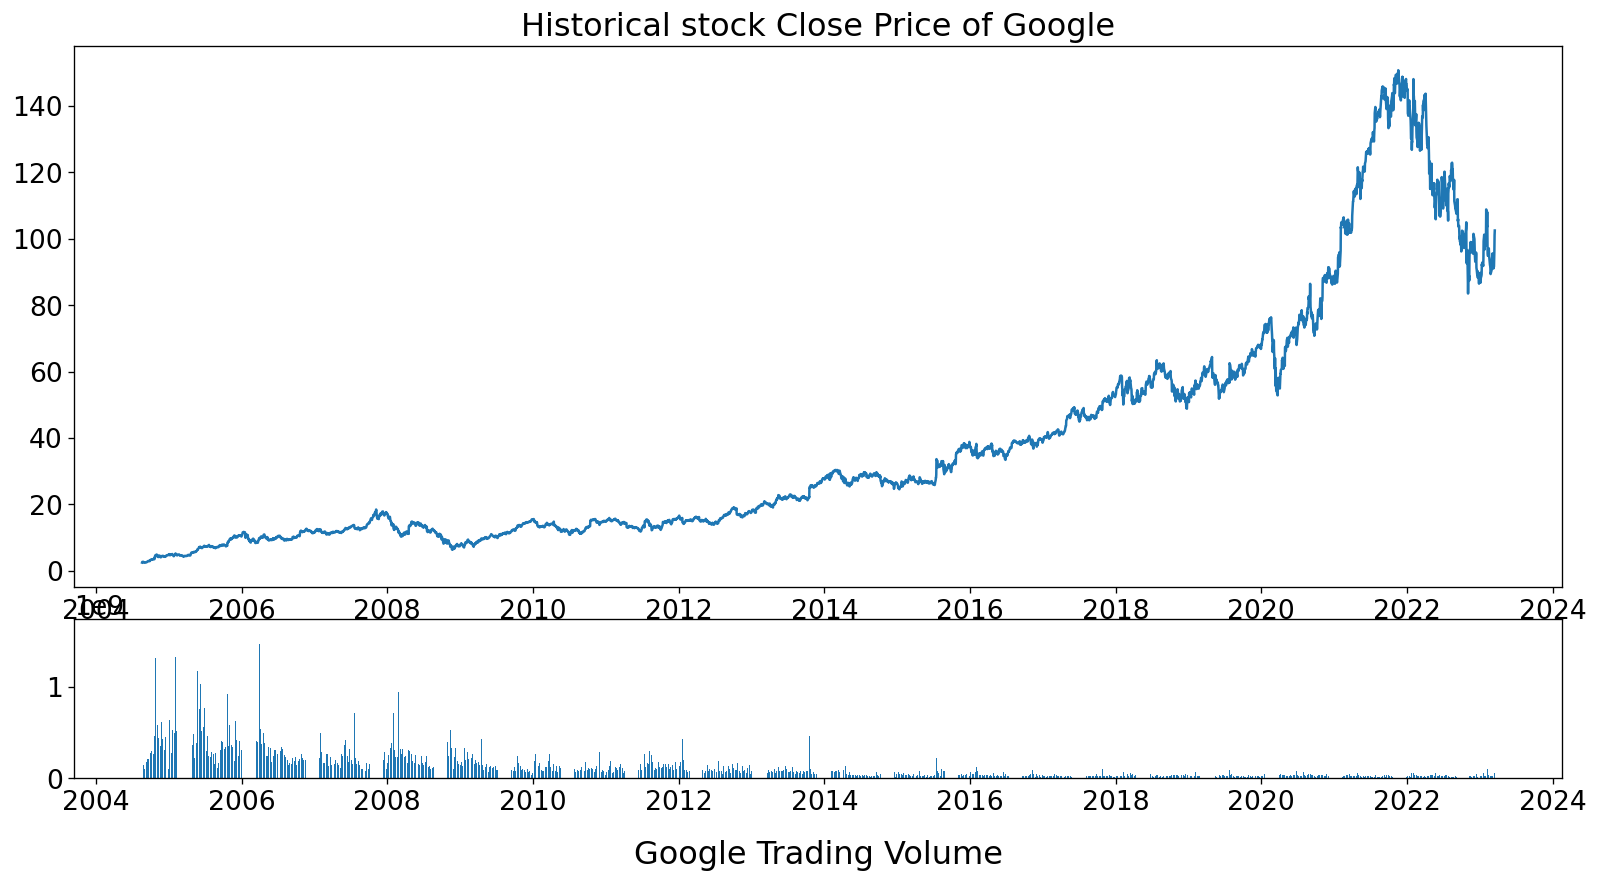

In [104]:
top_plt = plt.subplot2grid((5,4), (0, 0), rowspan = 3, colspan = 4)
top_plt.plot(dataset.Date, dataset["Close"])
plt.title('Historical stock Close Price of Google')
bottom_plt = plt.subplot2grid((5,4), (3,0), rowspan = 1, colspan = 4)
bottom_plt.bar(dataset.Date, dataset['Volume'])
plt.title('\nGoogle Trading Volume', y = -0.60)
plt.gcf().set_size_inches(16,10)

In [105]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4677.000000,4677.000000,4677.000000,4677.000000,4677.000000,4.677000e+03
mean,38.255309,38.656113,37.861995,38.265822,38.265822,1.226090e+08
std,35.540477,35.943265,35.161971,35.555944,35.555944,1.529406e+08
min,2.470490,2.534002,2.390042,2.490913,2.490913,1.584340e+05
25%,12.657307,12.771629,12.487195,12.640869,12.640869,2.968400e+07
50%,25.577278,25.772150,25.253166,25.534290,25.534290,6.698614e+07
75%,54.528500,55.233501,53.894001,54.546501,54.546501,1.527946e+08
max,151.863495,152.100006,149.887497,150.709000,150.709000,1.650833e+09


## Checking for Correlation

<Axes: >

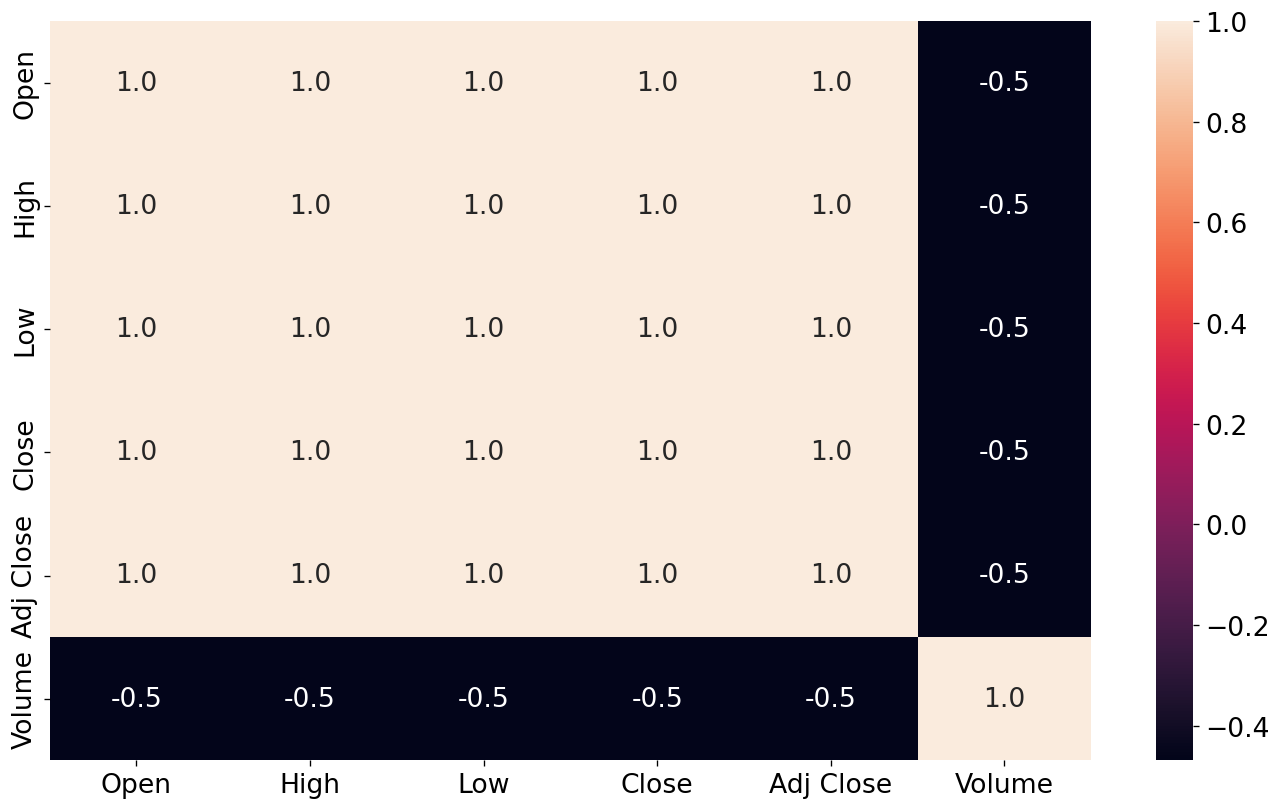

In [106]:
# plotting correlation heatmap
sns.heatmap(dataset.corr(), annot = True, fmt = ".1f")

We go forward with the features : Close and Volume

In [107]:
dataset2 = dataset[['Close', 'Volume']]
dataset2.head()

,Close,Volume
0,2.499133,897427216
1,2.697639,458857488
2,2.724787,366857939
3,2.611960,306396159
4,2.640104,184645512


# 3. Time Series Prediction

## Models considered :

  **<span style='color:#2980B9'>ARIMA  </span>**
    
  **<span style='color:#2980B9'>NEURAL NETWORK  </span>**
    
  **<span style='color:#2980B9'>RECURRENT NEURAL NETWORK  </span>**
    
  **<span style='color:#2980B9'>LSTM - LONG SHORT TERM MEMORY  </span>**

## ARIMA - Univariate Price Forecasting

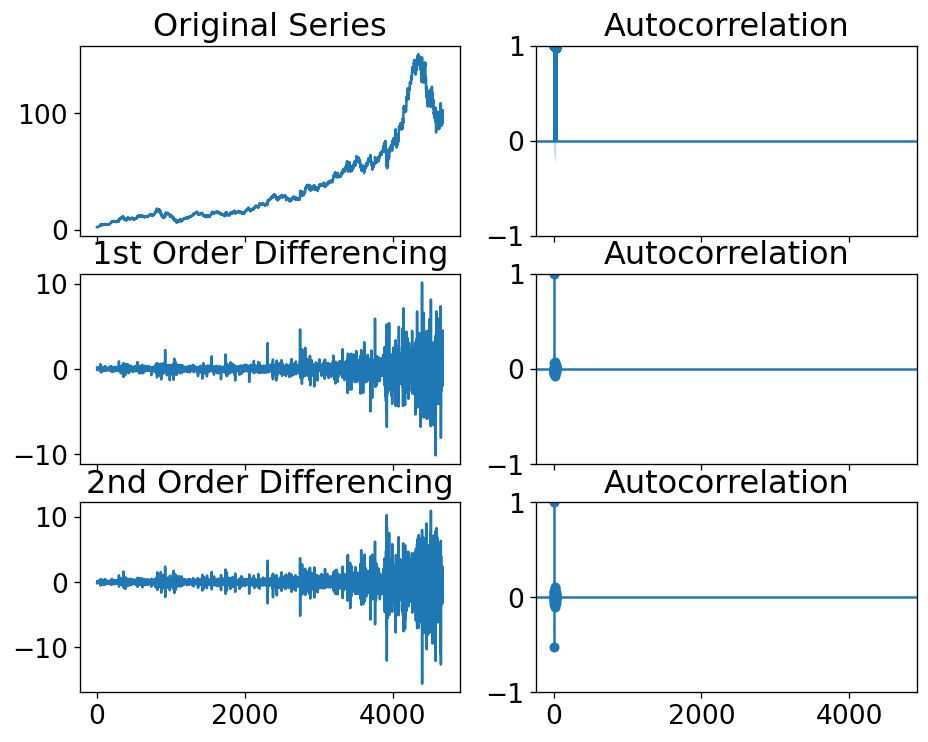

In [108]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(dataset2['Close'].values); axes[0, 0].set_title('Original Series')
plot_acf(dataset2['Close'].values, ax = axes[0, 1])

# 1st Differencing
axes[1, 0].plot(dataset2['Close'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(dataset2['Close'].diff().dropna(), ax = axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(dataset2['Close'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(dataset2['Close'].diff().diff().dropna(), ax = axes[2, 1])

plt.show()

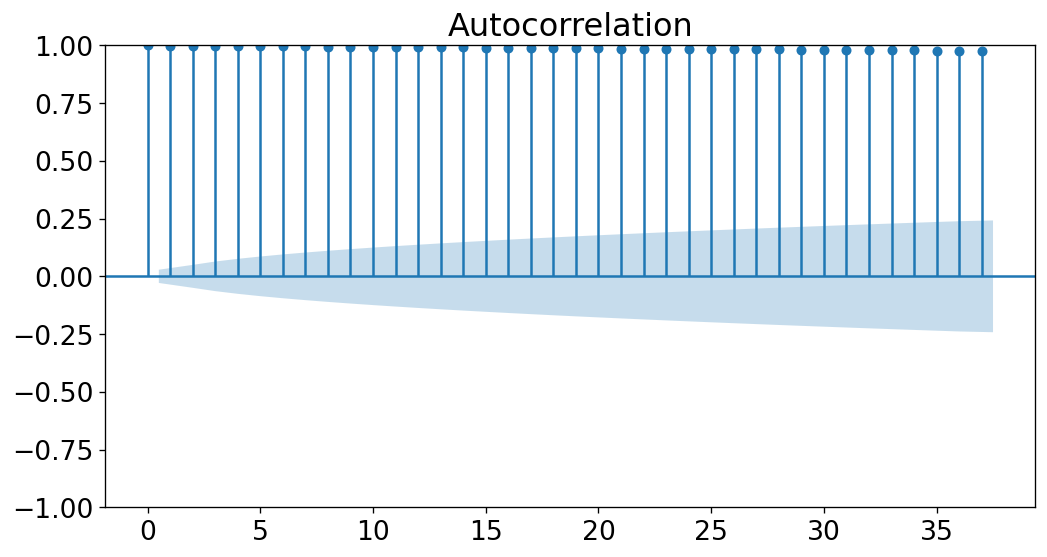

In [109]:
plt.rc("figure", figsize = (10,5))
plot_acf(dataset2['Close'])
print()

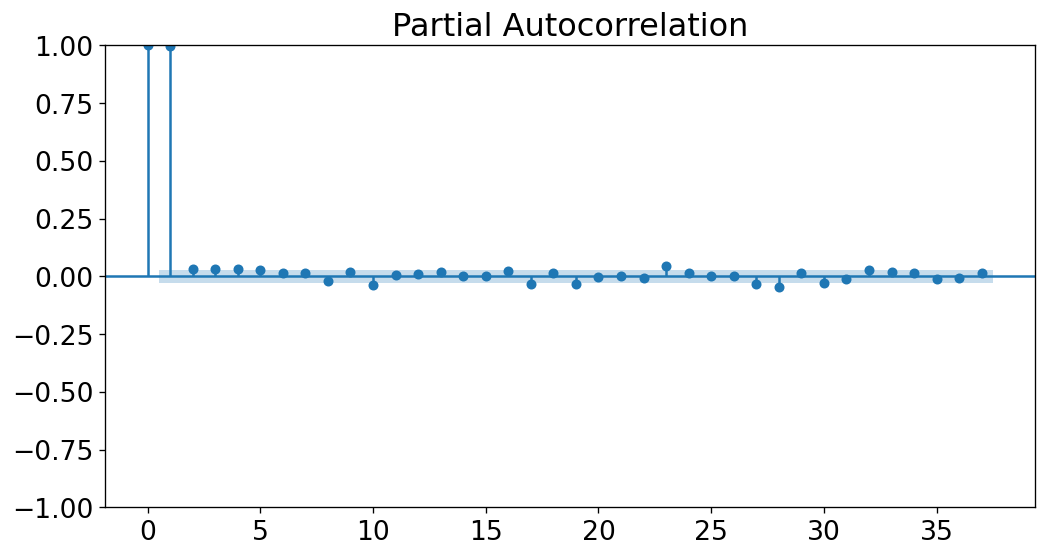

In [110]:
plt.rc("figure", figsize=(10,5))
plot_pacf(dataset2['Close'])
print()

We can observe that the PACF lag 2 is the only one that is quite significant and it is well above the significance line compared to other values. Hence, we can safely set p to 2.

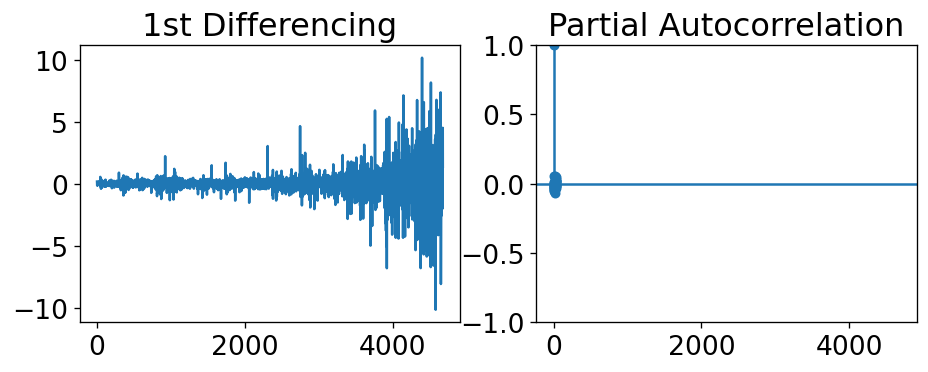

In [111]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex = True)
axes[0].plot(dataset2['Close'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim = (0,5))
plot_pacf(dataset2['Close'].diff().dropna(), ax = axes[1])

plt.show()

### Determining the order of the MA term  

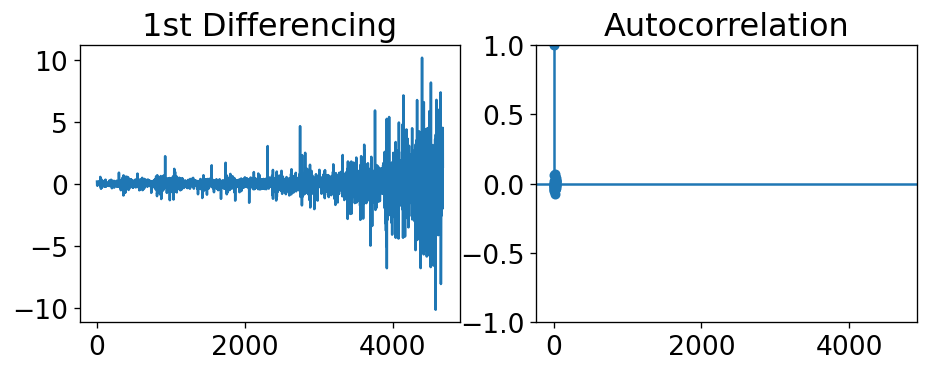

In [112]:
fig, axes = plt.subplots(1, 2, sharex = True)
axes[0].plot(dataset2['Close'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim = (0,1.2))
plot_acf(dataset2['Close'].diff().dropna(), ax=axes[1])

plt.show()

In [113]:
data = dataset2['Close'].values
print('Length of Total data: ', len(data))
train_length = int(len(data) * 0.8)
train_data = data[:train_length]
test_data = data[train_length:]
print('Train and Test data length: ', len(train_data), len(test_data))

Length of Total data:  4677
Train and Test data length:  3741 936


### Building ARIMA Model  

In [114]:
model = ARIMA(train_data, order = (1,0,8))
model_fit = model.fit(low_memory = False)
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3741
Model:                 ARIMA(1, 0, 8)   Log Likelihood               -2147.440
Date:                Sun, 19 Nov 2023   AIC                           4316.881
Time:                        11:53:25   BIC                           4385.379
Sample:                             0   HQIC                          4341.244
                               - 3741                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.2445     28.105      0.827      0.408     -31.840      78.329
ar.L1          0.9999      0.000   3383.985      0.000       0.999       1.000
ma.L1          0.0232      0.009      2.461      0.0

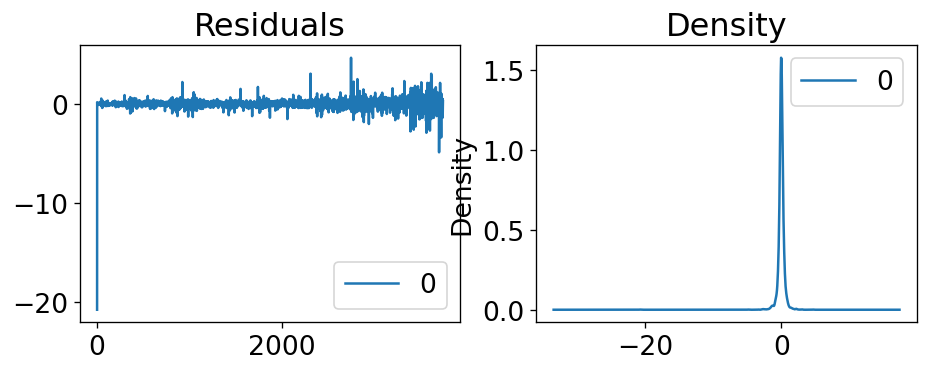

In [115]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title = "Residuals", ax = ax[0])
residuals.plot(kind = 'kde', title = 'Density', ax = ax[1])
plt.show()

In [116]:
# Forecast
forecast_result = model_fit.forecast(150, alpha = 0.05)
forecast_result[:30]

array([54.0705633 , 54.09947971, 54.12400802, 54.12347116, 54.19426192,
       54.19011664, 54.20672424, 54.18445513, 54.18077945, 54.17710421,
       54.17342941, 54.16975504, 54.1660811 , 54.16240761, 54.15873455,
       54.15506193, 54.15138974, 54.14771799, 54.14404667, 54.14037579,
       54.13670535, 54.13303535, 54.12936578, 54.12569664, 54.12202794,
       54.11835968, 54.11469185, 54.11102446, 54.10735751, 54.10369099])

In [117]:
test_data[:30]

array([54.89749908, 55.5625    , 56.07899857, 56.57949829, 55.81750107,
       56.24150085, 57.02399826, 57.21049881, 57.24499893, 57.51699829,
       57.67900085, 57.31750107, 57.31650162, 56.50500107, 56.9034996 ,
       57.3105011 , 56.89049911, 56.60599899, 62.52050018, 61.97050095,
       61.25699997, 60.83399963, 60.45050049, 59.69950104, 57.61600113,
       58.49750137, 58.69950104, 60.24000168, 59.40050125, 58.73550034])

### Plotting Test and Predicted Results  

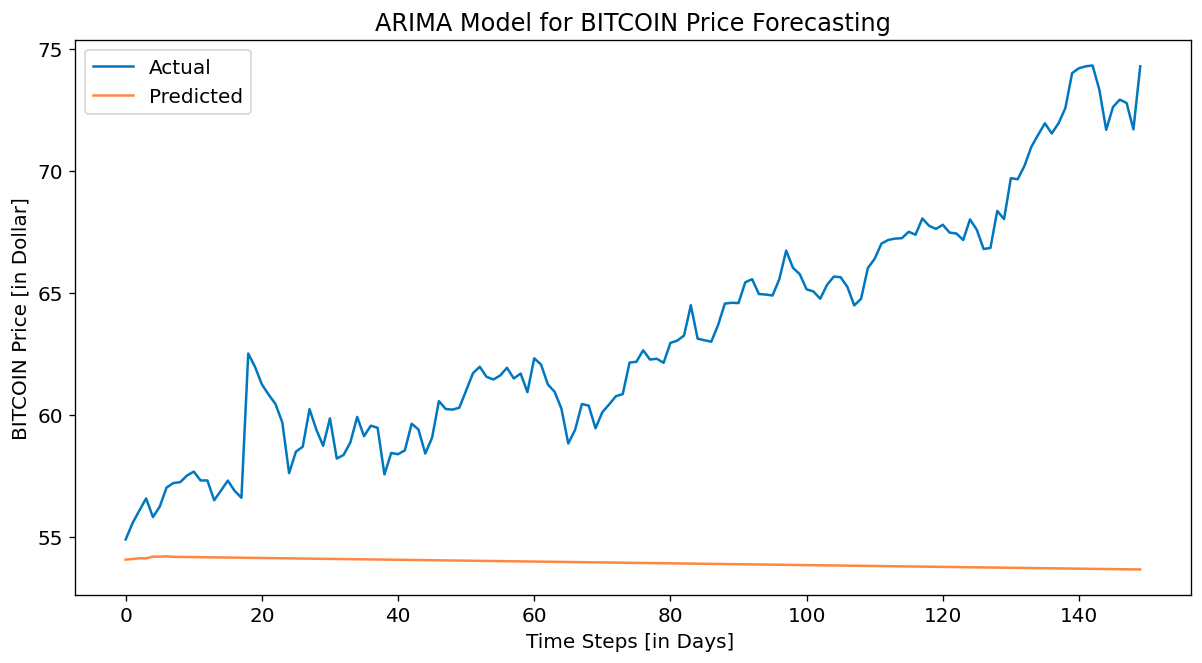

In [118]:
#  plotting Test and Predicted data

plt.figure(figsize = (12, 6))
plt.rcParams.update({'font.size': 12})
plt.plot(test_data[:150], '#0077be',label = 'Actual')
plt.plot(forecast_result[:], '#ff8841',label = 'Predicted')
plt.title('ARIMA Model for BITCOIN Price Forecasting')
plt.ylabel('BITCOIN Price [in Dollar]')
plt.xlabel('Time Steps [in Days] ')
plt.legend()
plt.show()

## Artificial Neural Network

In [119]:
data = dataset2['Close'].values
print('Shape of data: ', data.shape)

Shape of data:  (4677,)


In [120]:
# Separating train data and test data
train_length = int(len(data) * 0.8)
print('Train length: ', train_length)

train_data, test_data = data[:train_length], data[train_length:]
print('Shape of Train and Test data: ', train_data.shape, test_data.shape)

Train length:  3741
Shape of Train and Test data:  (3741,) (936,)


Changing dataset shape to 2D

In [121]:
train_data = train_data.reshape(-1, 1)
test_data = test_data.reshape(-1, 1)
print('Shape of Train and Test data: ', train_data.shape, test_data.shape)

Shape of Train and Test data:  (3741, 1) (936, 1)


In [122]:
def create_dataset(dataset, lookback):
    dataX, dataY = [], []
    for i in range(len(dataset) - lookback -1):
        a = dataset[i: (i+lookback), 0]
        dataX.append(a)
        b = dataset[i+lookback, 0]
        dataY.append(b)
    return np.array(dataX), np.array(dataY)

### Selecting Lag value from PACF graph

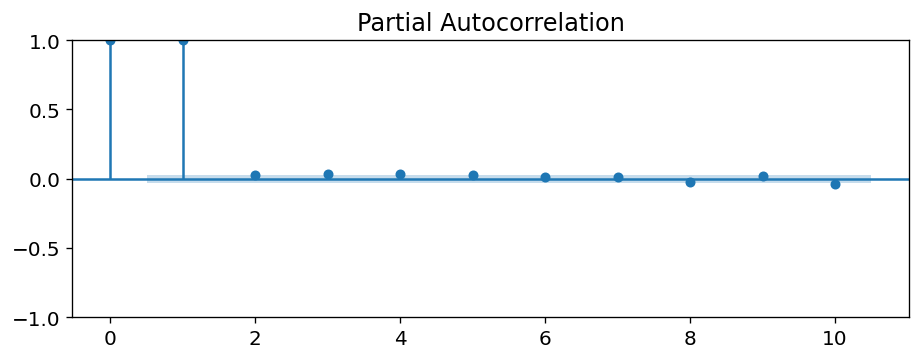

In [123]:
plot_pacf(data, lags = 10)
plt.show()

### Considering only Auto-correlation Lag value Greater than 10%

In [124]:
pacf_value = pacf(data, nlags=20)
lag = 0
# collecting lag values greater than 10% correlation
for x in pacf_value:
    if x > 0.1:
        lag += 1
    else:
        break
print('Selected look_back (or lag = ): ', lag)

Selected look_back (or lag = ):  2


### Separating Input and Output values

In [125]:
train_X, train_y = create_dataset(train_data, lag)
test_X, test_y = create_dataset(test_data, lag)

In [126]:
print('Shape of train_X and train_y: ', train_X.shape, train_y.shape)
print('Shape of test_X and test_y: ', test_X.shape, test_y.shape)

Shape of train_X and train_y:  (3738, 2) (3738,)
Shape of test_X and test_y:  (933, 2) (933,)


### Building an MLP model

In [127]:
np.random.seed(7)

In [128]:
model = Sequential()
model.add(Dense(64, input_dim = lag, activation='relu', name= "1st_hidden"))
# model.add(Dense(64, activation='relu', name = '2nd_hidden'))
model.add(Dense(1, name = 'Output_layer', activation = 'linear'))
# model.add(Activation("linear", name = 'Linear_activation'))
model.compile(loss = "mean_squared_error", optimizer = "adam")
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1st_hidden (Dense)          (None, 64)                192       
                                                                 
 Output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 257 (1.00 KB)
Trainable params: 257 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Fitting data to Model

In [129]:
epoch_number = 100
batches = 64

history = model.fit(train_X, train_y, epochs = epoch_number, batch_size = batches, verbose = 1, shuffle = False,
                    validation_split = 0.1)

Epoch 1/100
53/53 [==============================] - 1s 25ms/step - loss: 16.3807 - val_loss: 1.7715
Epoch 2/100
53/53 [==============================] - 1s 25ms/step - loss: 0.3567 - val_loss: 1.2579
Epoch 3/100
53/53 [==============================] - 1s 24ms/step - loss: 0.1696 - val_loss: 1.2524
Epoch 4/100
53/53 [==============================] - 1s 25ms/step - loss: 0.1696 - val_loss: 1.2502
Epoch 5/100
53/53 [==============================] - 1s 24ms/step - loss: 0.1682 - val_loss: 1.2510
Epoch 6/100
53/53 [==============================] - 1s 24ms/step - loss: 0.1679 - val_loss: 1.2505
Epoch 7/100
53/53 [==============================] - 1s 24ms/step - loss: 0.1687 - val_loss: 1.2480
Epoch 8/100
53/53 [==============================] - 2s 29ms/step - loss: 0.1699 - val_loss: 1.2449
Epoch 9/100
53/53 [==============================] - 2s 33ms/step - loss: 0.1712 - val_loss: 1.2428
Epoch 10/100
53/53 [==============================] - 2s 33ms/step - loss: 0.1722 - val_loss: 1.243

### Train and Validation Loss

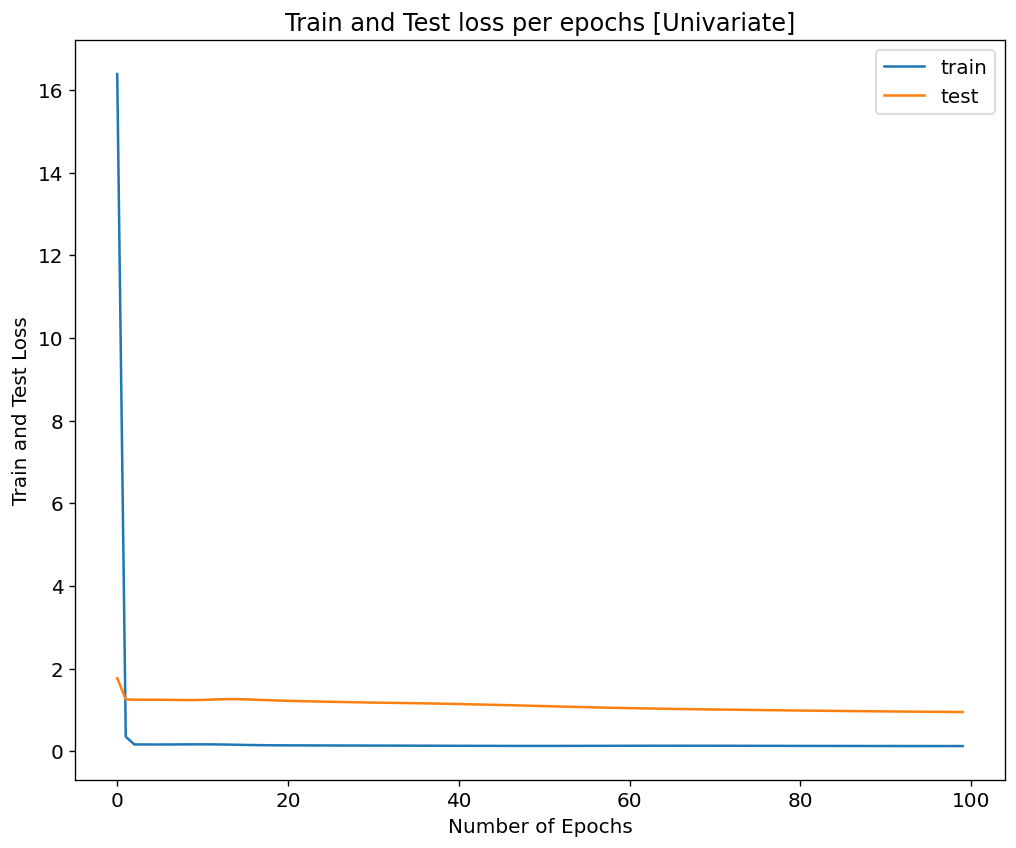

In [130]:
# plotting history
plt.clf
plt.figure(figsize = (10,8))
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.xlabel('Number of Epochs')
plt.ylabel('Train and Test Loss')
plt.title('Train and Test loss per epochs [Univariate]')
plt.legend()
plt.show()

### Making Predictions

In [131]:
# Make prediction
testPredict = model.predict(test_X)
predicted_value = testPredict[:, 0]

30/30 [==============================] - 0s 3ms/step


### Evaluation Metrics for measuring performance

* **<span style='color:#0A7681'> R-Squared </span>**

* **<span style='color:#0A7681'> Mean Absolute Error </span>**

* **<span style='color:#0A7681'> Mean Absolute Percentage Error</span>**

* **<span style='color:#0A7681'> Mean Squared Error</span>**

* **<span style='color:#0A7681'> Root Mean Squared Error</span>**

* **<span style='color:#0A7681'> Normalized Root Mean Squared Error</span>**

* **<span style='color:#0A7681'> Weighted Absolute Percentage Error</span>**

* **<span style='color:#0A7681'> Weighted Mean Absolute Percentage Error</span>**

In [132]:
def evaluate_forecast_results(actual, predicted):
    print('R2 Score: ', round(r2_score(actual, predicted), 2))
    print('MAE : ', round(mae(actual, predicted), 2))
    print('MSE: ', round(mean_squared_error(actual,predicted), 2))
    print('RMSE: ', round(math.sqrt(mean_squared_error(actual,predicted)), 2))
    print('NRMSE: ', NRMSE(actual, predicted))
    print('WMAPE: ', WMAPE(actual, predicted))

def NRMSE(actual, predicted):
    rmse = math.sqrt(mean_squared_error(actual,predicted))
    nrmse = rmse / np.mean(actual)
    return round(nrmse, 4)

def WMAPE(actual, predicted):
    abs_error = np.sum(actual - predicted)
    wmape = abs_error / np.sum(actual)
    return round(wmape, 4)

In [133]:
evaluate_forecast_results(test_y, predicted_value)

R2 Score:  0.99
MAE :  1.48
MSE:  4.27
RMSE:  2.07
NRMSE:  0.021
WMAPE:  0.0021


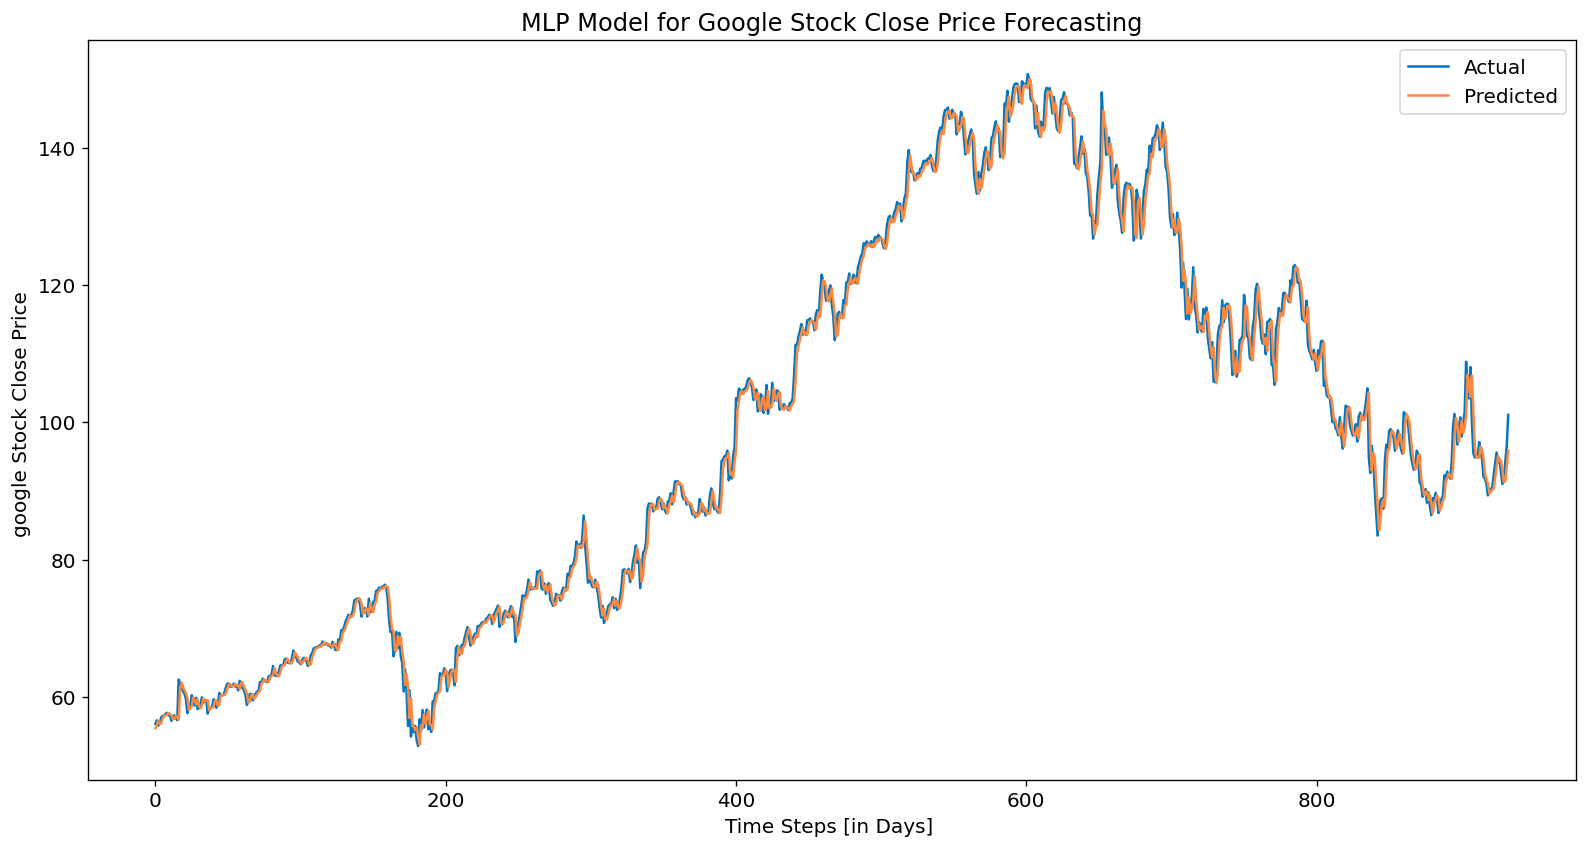

In [134]:
plt.figure(figsize = (16, 8))
plt.rcParams.update({'font.size': 12})
plt.plot(test_y[:], '#0077be', label = 'Actual')
plt.plot(predicted_value, '#ff8841', label = 'Predicted')
plt.title('MLP Model for Google Stock Close Price Forecasting')
plt.ylabel('google Stock Close Price ')
plt.xlabel('Time Steps [in Days] ')
plt.legend()
plt.show()

## RNN - Univariate Time Series Forecasting


In [135]:
data = dataset2['Close'].values
print('Shape of data: ', data.shape)

Shape of data:  (4677,)


In [136]:
# Separate train and test data
train_length = int(len(data) * 0.8)
print('Train length: ', train_length)

train_data, test_data = data[:train_length], data[train_length:]
print('Shape of Train and Test data: ', len(train_data), len(test_data))

Train length:  3741
Shape of Train and Test data:  3741 936


In [137]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

### Lag Value already to be chosen from PACF Plot

In [138]:
pacf_value = pacf(data, nlags=20)
lag = 0
# collect lag values greater than 10% correlation
for x in pacf_value:
    if x > 0.1:
        lag += 1
    else:
        break
print('Selected look_back (or lag = ): ', lag)

Selected look_back (or lag = ):  2


In [139]:
n_features = 1

In [140]:
train_X, train_y = split_sequence(train_data, lag)
test_X, test_y = split_sequence(test_data, lag)

In [141]:
print('Shape of train_X and train_y: ', train_X.shape, train_y.shape)
print('Shape of test_X and test_y: ', test_X.shape, test_y.shape)

Shape of train_X and train_y:  (3739, 2) (3739,)
Shape of test_X and test_y:  (934, 2) (934,)


### Reshaping train_X and test_X to 3-D

In [142]:
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features))

In [143]:
# New shape of train_X and test_X
print('Shape of train_X and train_y: ', train_X.shape, train_y.shape)
print('Shape of test_X and test_y: ', test_X.shape, test_y.shape)

Shape of train_X and train_y:  (3739, 2, 1) (3739,)
Shape of test_X and test_y:  (934, 2, 1) (934,)


### Building the model

In [144]:
# defining model
model = Sequential()
model.add(SimpleRNN(64, activation='relu', return_sequences = False, input_shape = (lag, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 64)                4224      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4289 (16.75 KB)
Trainable params: 4289 (16.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Fit the model - with training data

In [145]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [146]:
# fitting model
cb = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 15, restore_best_weights = True)
history = model.fit(train_X, train_y, epochs = 100, batch_size = 64, verbose = 1, validation_split = 0.1,
                   callbacks = [cb])

Epoch 1/100
53/53 [==============================] - 2s 36ms/step - loss: 182.0147 - val_loss: 7.1228
Epoch 2/100
53/53 [==============================] - 2s 37ms/step - loss: 0.7555 - val_loss: 2.0308
Epoch 3/100
53/53 [==============================] - 2s 36ms/step - loss: 0.2169 - val_loss: 1.7205
Epoch 4/100
53/53 [==============================] - 2s 43ms/step - loss: 0.2126 - val_loss: 1.6804
Epoch 5/100
53/53 [==============================] - 3s 49ms/step - loss: 0.2124 - val_loss: 1.6941
Epoch 6/100
53/53 [==============================] - 2s 40ms/step - loss: 0.2119 - val_loss: 1.6935
Epoch 7/100
53/53 [==============================] - 2s 36ms/step - loss: 0.2113 - val_loss: 1.6829
Epoch 8/100
53/53 [==============================] - 2s 37ms/step - loss: 0.2090 - val_loss: 1.6795
Epoch 9/100
53/53 [==============================] - 2s 37ms/step - loss: 0.2074 - val_loss: 1.7244
Epoch 10/100
53/53 [==============================] - 2s 38ms/step - loss: 0.2072 - val_loss: 1.67

### Summarizing model accuracy and Loss

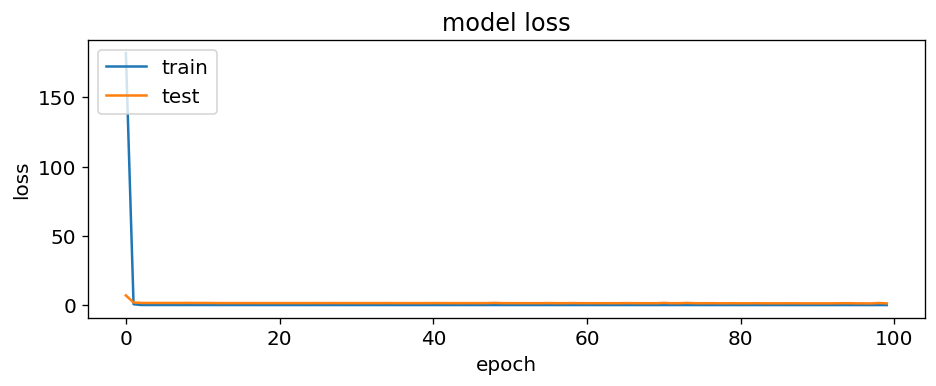

In [147]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

### Making prediction with Test data

In [148]:
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

print('Shape of train and test predict: ', train_predict.shape, test_predict.shape)

30/30 [==============================] - 0s 12ms/step
Shape of train and test predict:  (3739, 1) (934, 1)


### Model evaluation

In [149]:
actual_ = test_y
predicted_ = test_predict[:, 0]
len(actual_), len(predicted_)

(934, 934)

In [150]:
evaluate_forecast_results(actual_, predicted_)

R2 Score:  0.99
MAE :  1.73
MSE:  5.77
RMSE:  2.4
NRMSE:  0.0244
WMAPE:  0.0013


### Plotting test and predicted data


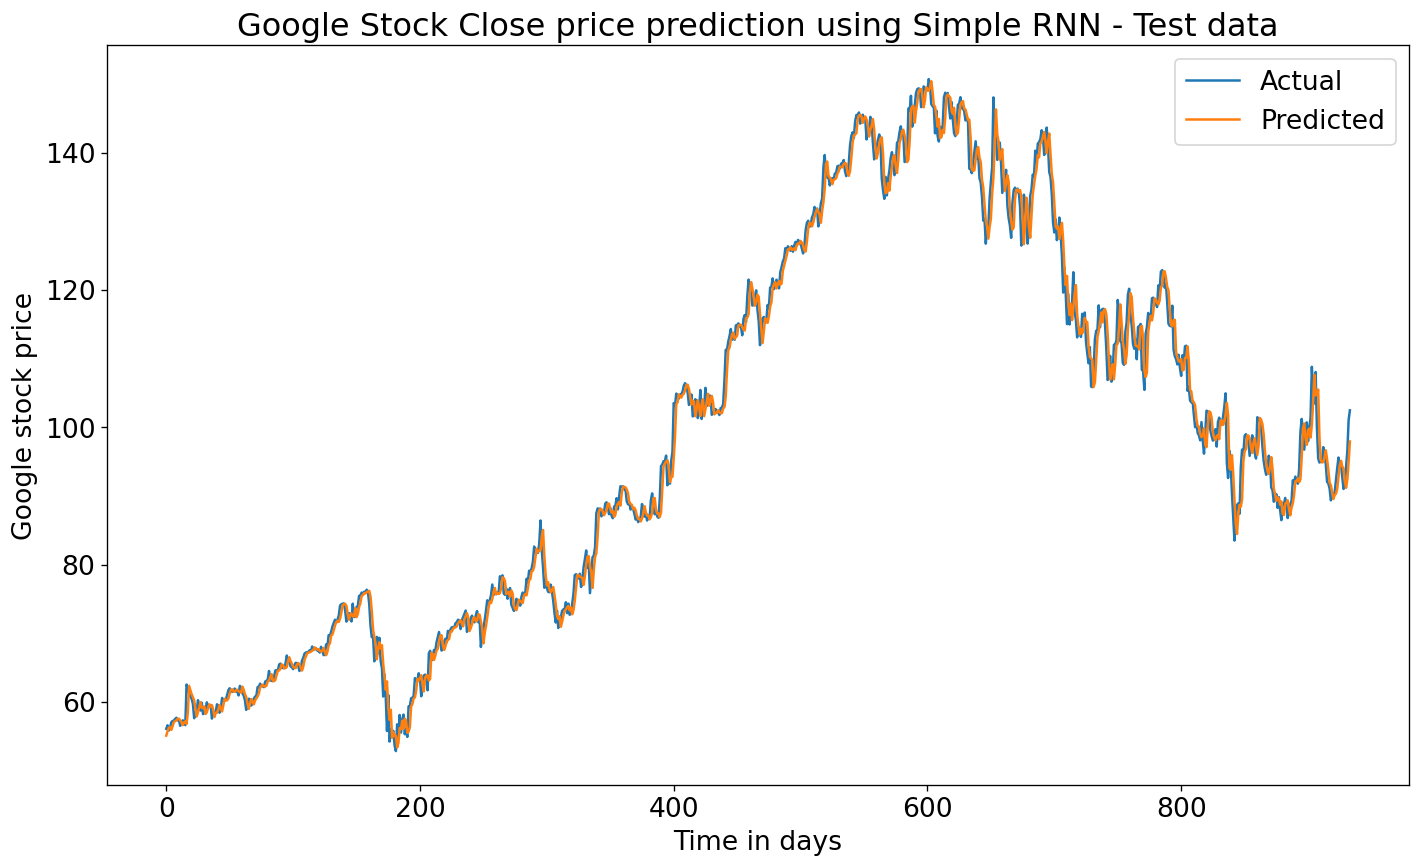

In [151]:
plt.rc("figure", figsize = (14,8))
plt.rcParams.update({'font.size': 16})
plt.plot(actual_, label = 'Actual')
plt.plot(predicted_, label = 'Predicted')
plt.xlabel('Time in days')
plt.ylabel('Google stock price')
plt.title('Google Stock Close price prediction using Simple RNN - Test data')
plt.legend()
plt.show()

In [152]:
df_train = pd.DataFrame(columns = ['Train data'])
df_train['Train data'] = train_data

df = pd.DataFrame(columns = ['Test data', 'Predicted data'])
df['Test data'] = actual_
df['Predicted data'] = predicted_

total_len = len(df_train['Train data']) + len(df['Test data'])
range(len(df_train['Train data']), total_len)
x_list = [x for x in range(len(df_train['Train data']), total_len)]
df.index = x_list

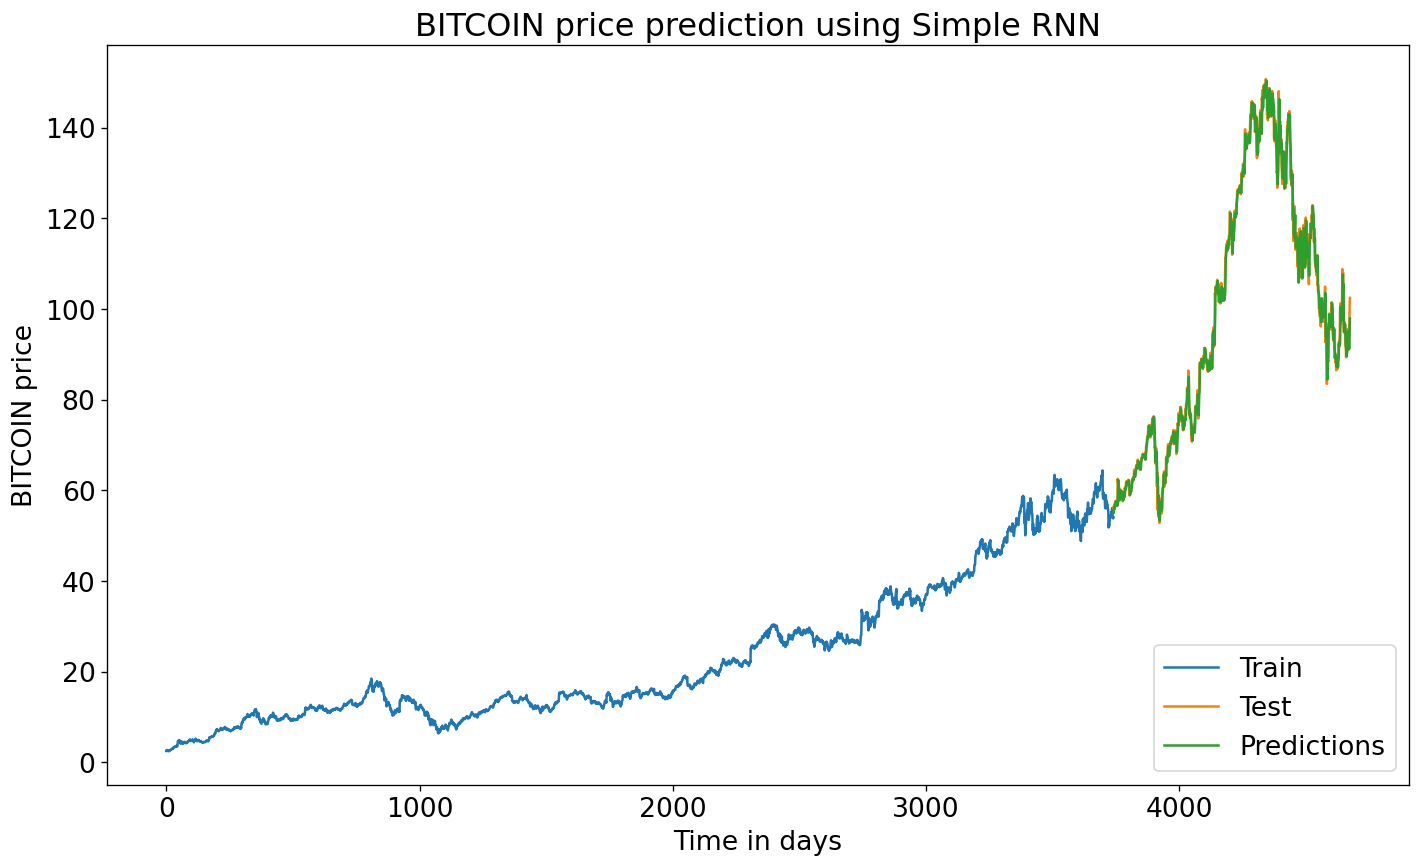

In [153]:
plt.rc("figure", figsize=(14,8))
plt.rcParams.update({'font.size': 16})
plt.xlabel('Time in days')
plt.ylabel('BITCOIN price')
plt.title('BITCOIN price prediction using Simple RNN')
plt.plot(df_train['Train data'])
plt.plot(df[['Test data', 'Predicted data']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()

##LSTM

In [154]:
data = dataset2['Close'].values
print('Shape of data: ', data.shape)

Shape of data:  (4677,)


In [155]:
# Separate train data and test data
train_length = int(len(data) * 0.8)
print('Train length: ', train_length)
train_data, test_data = data[:train_length], data[train_length:]
print('Shape of Train and Test data: ', len(train_data), len(test_data))

Train length:  3741
Shape of Train and Test data:  3741 936


In [156]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

### Choosing the appropriate lag value

In [157]:
lag = 2
n_features = 1

In [158]:
train_X, train_y = split_sequence(train_data, lag)
test_X, test_y = split_sequence(test_data, lag)

print('Shape of train_X and train_y: ', train_X.shape, train_y.shape)
print('Shape of test_X and test_y: ', test_X.shape, test_y.shape)

Shape of train_X and train_y:  (3739, 2) (3739,)
Shape of test_X and test_y:  (934, 2) (934,)


### Reshaping train_X and test_X to 3D

In [159]:
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features))

print('Shape of train_X and train_y: ', train_X.shape, train_y.shape)
print('Shape of test_X and test_y: ', test_X.shape, test_y.shape)

Shape of train_X and train_y:  (3739, 2, 1) (3739,)
Shape of test_X and test_y:  (934, 2, 1) (934,)


### Building LSTM Model

In [160]:
model = Sequential()
model.add(LSTM(64, activation = 'relu', return_sequences = True, input_shape = (lag, n_features)))
model.add(LSTM(64, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 2, 64)             16896     
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 49985 (195.25 KB)
Trainable params: 49985 (195.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Fitting model with data

In [161]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [162]:
cb = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 15, restore_best_weights = True)
history = model.fit(train_X, train_y, epochs = 100, batch_size = 64, verbose = 1, validation_split =  0.1,
                   callbacks = [cb])

Epoch 1/100
53/53 [==============================] - 4s 68ms/step - loss: 317.6581 - val_loss: 126.8429
Epoch 2/100
53/53 [==============================] - 4s 70ms/step - loss: 3.6155 - val_loss: 3.8612
Epoch 3/100
53/53 [==============================] - 4s 82ms/step - loss: 0.7525 - val_loss: 2.7833
Epoch 4/100
53/53 [==============================] - 4s 79ms/step - loss: 0.5591 - val_loss: 1.9554
Epoch 5/100
53/53 [==============================] - 4s 67ms/step - loss: 0.4231 - val_loss: 1.6616
Epoch 6/100
53/53 [==============================] - 4s 70ms/step - loss: 0.3227 - val_loss: 1.7735
Epoch 7/100
53/53 [==============================] - 5s 93ms/step - loss: 0.2647 - val_loss: 1.7968
Epoch 8/100
53/53 [==============================] - 3s 66ms/step - loss: 0.2298 - val_loss: 2.0875
Epoch 9/100
53/53 [==============================] - 4s 70ms/step - loss: 0.2083 - val_loss: 1.9269
Epoch 10/100
53/53 [==============================] - 4s 77ms/step - loss: 0.1922 - val_loss: 1.

### Summarizing model accuracy and Loss

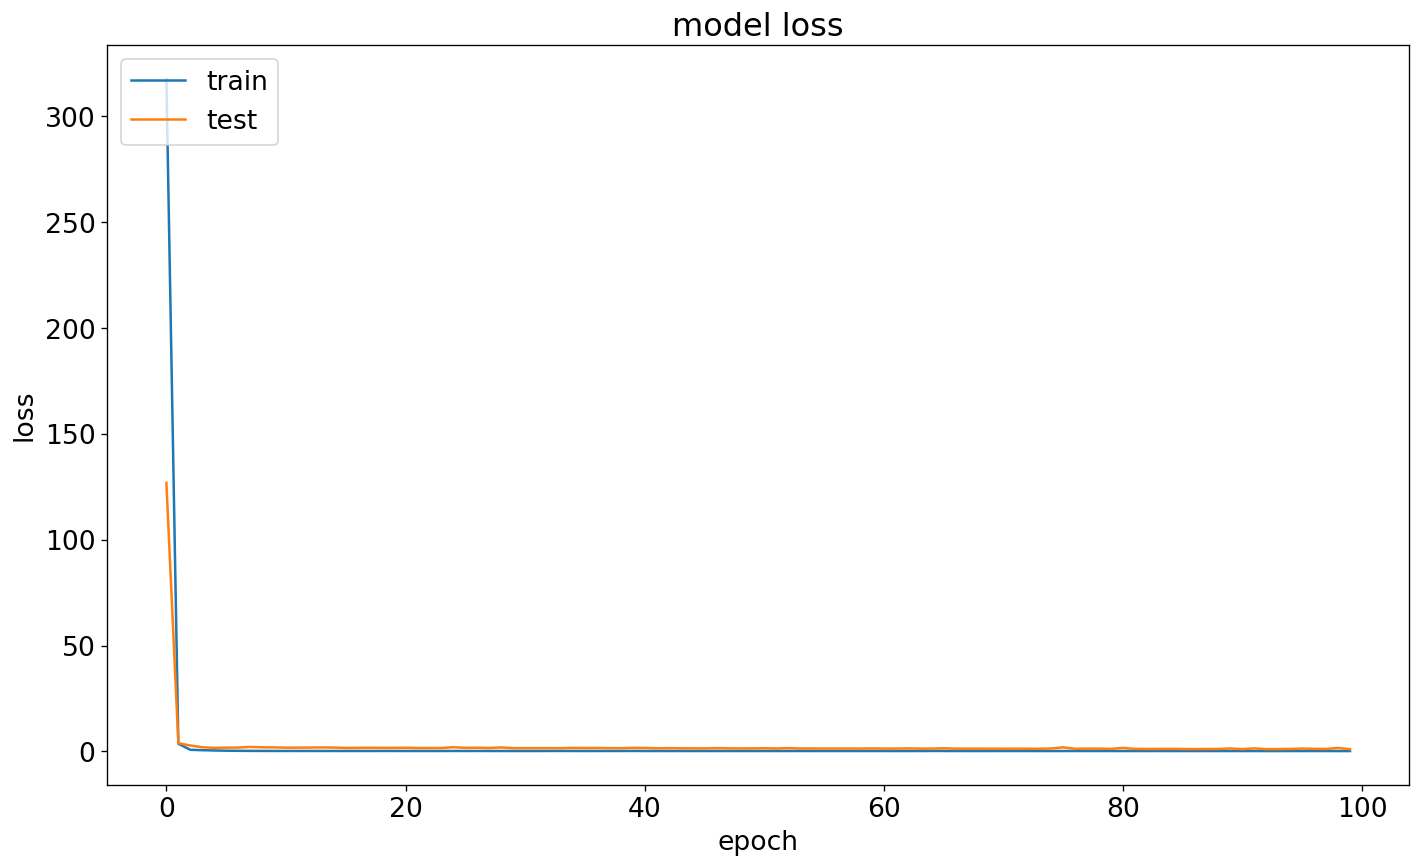

In [163]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

### Making the prediction

In [164]:
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

print('Shape of train and test predict: ', train_predict.shape, test_predict.shape)

30/30 [==============================] - 1s 23ms/step
Shape of train and test predict:  (3739, 1) (934, 1)


### Model Evaluation

In [165]:
actual_lstm = test_y
predicted_lstm = test_predict[:, 0]
evaluate_forecast_results(actual_lstm, predicted_lstm)

R2 Score:  0.99
MAE :  1.47
MSE:  4.23
RMSE:  2.06
NRMSE:  0.0209
WMAPE:  0.0001


In [166]:
df_train = pd.DataFrame(columns = ['Train data'])
df_train['Train data'] = train_data

df = pd.DataFrame(columns = ['Test data', 'Predicted data'])
df['Test data'] = actual_lstm
df['Predicted data'] = predicted_lstm

total_len = len(df_train['Train data']) + len(df['Test data'])
range(len(df_train['Train data']), total_len)
x_list = [x for x in range(len(df_train['Train data']), total_len)]
df.index = x_list

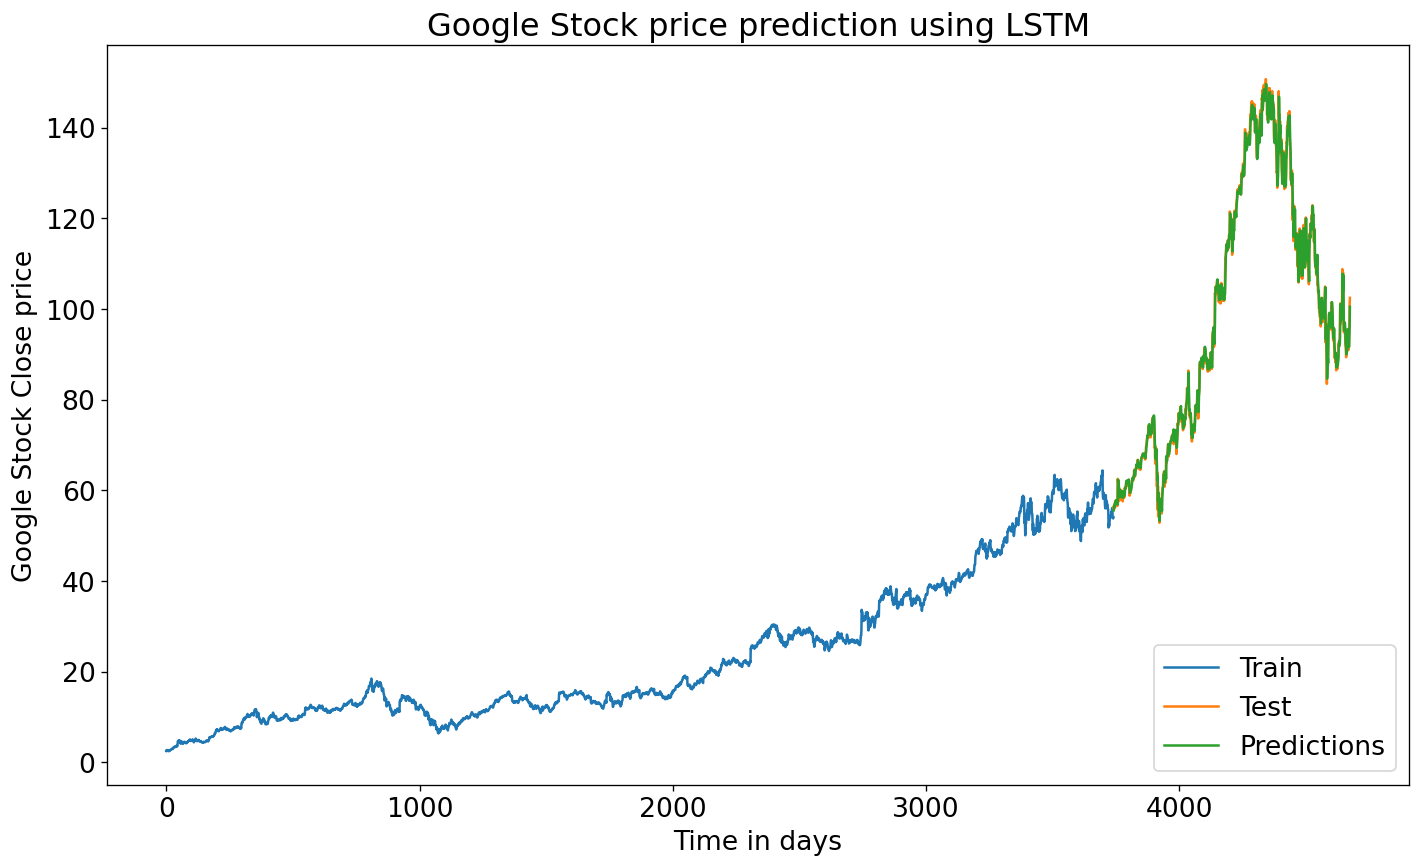

In [167]:
plt.rc("figure", figsize = (14,8))
plt.rcParams.update({'font.size': 16})
plt.xlabel('Time in days')
plt.ylabel('Google Stock Close price')
plt.title('Google Stock price prediction using LSTM')
plt.plot(df_train['Train data'])
plt.plot(df[['Test data', 'Predicted data']])
plt.legend(['Train', 'Test', 'Predictions'], loc = 'lower right')
plt.show()